In [229]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
#from igraph import Graph
from scipy import special

In [34]:
path = "/Users/sophiakrix/Desktop/MechEnrichmentLab/NOTCH1_Intracellular.txt"
df = pd.read_csv(path, sep = "\t", header=None, names=["Protein1", "interaction", "Protein2"])

In [35]:
df.head()

,Protein1,interaction,Protein2
0,CCNC,in-complex-with,CDK8
1,CCNC,in-complex-with,CREBBP
2,CCNC,in-complex-with,EP300
3,CCNC,in-complex-with,KAT2A
4,CCNC,in-complex-with,KAT2B


In [36]:
df.columns

Index(['Protein1', 'interaction', 'Protein2'], dtype='object')

In [40]:
interactions_set = set(df.iloc[:,1])
interactions_set

{'controls-expression-of', 'controls-state-change-of', 'in-complex-with'}

In [42]:
interactions = df["interaction"].value_counts()
interactions

in-complex-with             234
controls-expression-of       72
controls-state-change-of     12
Name: interaction, dtype: int64

In [116]:
df_interactions = df.replace("in-complex-with", +1)
df_interactions = df_interactions.replace("controls-expression-of", -1)
df_interactions = df_interactions.replace("controls-state-change-of", -1)

In [117]:
df_interactions["interaction"].value_counts()

 1    234
-1     84
Name: interaction, dtype: int64

# NetworkX

In [155]:
G = nx.DiGraph()

In [156]:
len(df_interactions)

318

In [157]:
for i in range(len(df_interactions)):
    prot1 = df_interactions.iloc[i,0]
    prot2 = df_interactions.iloc[i,2]
    interaction = df_interactions.iloc[i,1]
    G.add_node(prot1)
    G.add_node(prot2)
    G.add_edge(prot1, prot2)
    G[prot1][prot2]['relation'] = interaction

In [163]:
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        relation = eattr['relation']
        #print(n, nbr, relation)

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


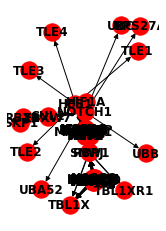

In [122]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
#plt.subplot(122)
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [123]:
# Nr edges and nr of nodes 

print("Number of edges: ",G.number_of_edges(),"\nNumber of nodes: ",G.number_of_nodes())


Number of edges:  290 
Number of nodes:  47


# Algorithmic Development

In [164]:
"""
Randomly assigns labels of [-1,0,1] to nodes in a graph
Labels:
-1 : Downregulated
0 : No change
+1 : Upregulated

Input:
    - graph : the graph consisting of protein nodes 

Output:
    - prints list of nodes with associated attribute label
"""
def random_node_labels(graph):
    for node in graph.nodes():
        random_label = random.randint(-1,1)
        graph.nodes[node]['label'] = random_label
    print(graph.nodes.data())

In [165]:
random_node_labels(G)

[('CCNC', {'label': 1}), ('CDK8', {'label': 1}), ('CREBBP', {'label': 0}), ('EP300', {'label': -1}), ('KAT2A', {'label': 0}), ('KAT2B', {'label': 0}), ('MAML1', {'label': -1}), ('MAML2', {'label': 1}), ('MAML3', {'label': 1}), ('MAMLD1', {'label': 1}), ('NOTCH1', {'label': 0}), ('RBPJ', {'label': 0}), ('SNW1', {'label': -1}), ('HES1', {'label': 1}), ('HES5', {'label': 0}), ('HEY1', {'label': 0}), ('HEY2', {'label': 0}), ('HEYL', {'label': 0}), ('MYC', {'label': -1}), ('CUL1', {'label': 1}), ('FBXW7', {'label': 1}), ('RBX1', {'label': -1}), ('SKP1', {'label': -1}), ('HDAC10', {'label': -1}), ('NCOR1', {'label': 1}), ('NCOR2', {'label': 1}), ('TBL1XR1', {'label': 0}), ('TBL1X', {'label': -1}), ('HDAC11', {'label': 0}), ('HDAC1', {'label': 0}), ('HDAC2', {'label': -1}), ('HDAC3', {'label': -1}), ('HDAC4', {'label': 1}), ('HDAC5', {'label': 1}), ('HDAC6', {'label': -1}), ('HDAC7', {'label': -1}), ('HDAC8', {'label': 0}), ('HDAC9', {'label': -1}), ('TLE1', {'label': 0}), ('TLE2', {'label': 

In [185]:
"""
Caclulates the shortest path between two nodes.

Input:
    - graph : NetworkX graph
    - source : upstream source node


Output:
    - dictionary of shortest path nodes between source node and all other nodes in graph
"""
def shortest_path(graph, source):
    for target in graph.nodes():
        shortest_paths = nx.shortest_path(graph, source)
    return shortest_paths

In [186]:
shortest_path(G, "CCNC")

{'CCNC': ['CCNC'],
 'CDK8': ['CCNC', 'CDK8'],
 'CREBBP': ['CCNC', 'CREBBP'],
 'EP300': ['CCNC', 'EP300'],
 'KAT2A': ['CCNC', 'KAT2A'],
 'KAT2B': ['CCNC', 'KAT2B'],
 'MAML1': ['CCNC', 'MAML1'],
 'MAML2': ['CCNC', 'MAML2'],
 'MAML3': ['CCNC', 'MAML3'],
 'MAMLD1': ['CCNC', 'MAMLD1'],
 'NOTCH1': ['CCNC', 'NOTCH1'],
 'RBPJ': ['CCNC', 'RBPJ'],
 'SNW1': ['CCNC', 'SNW1'],
 'HES1': ['CCNC', 'CREBBP', 'HES1'],
 'HES5': ['CCNC', 'CREBBP', 'HES5'],
 'HEY1': ['CCNC', 'CREBBP', 'HEY1'],
 'HEY2': ['CCNC', 'CREBBP', 'HEY2'],
 'HEYL': ['CCNC', 'CREBBP', 'HEYL'],
 'MYC': ['CCNC', 'CREBBP', 'MYC'],
 'RBX1': ['CCNC', 'NOTCH1', 'RBX1'],
 'RPS27A': ['CCNC', 'NOTCH1', 'RPS27A'],
 'SKP1': ['CCNC', 'NOTCH1', 'SKP1'],
 'UBA52': ['CCNC', 'NOTCH1', 'UBA52'],
 'UBB': ['CCNC', 'NOTCH1', 'UBB'],
 'UBC': ['CCNC', 'NOTCH1', 'UBC'],
 'TBL1XR1': ['CCNC', 'RBPJ', 'TBL1XR1'],
 'TBL1X': ['CCNC', 'RBPJ', 'TBL1X'],
 'TLE1': ['CCNC', 'CREBBP', 'HES1', 'TLE1'],
 'TLE2': ['CCNC', 'CREBBP', 'HES1', 'TLE2'],
 'TLE3': ['CCNC', 'CR

In [218]:
"""
Check if node labels of source and target node are the same

Input:
    - graph: NetworkX graph
    - source: source upstream node
    
Output:
    - list of concordant and non-concordant nodes for the source node
"""
def count_concordance(graph, source):
    
    same_label = False

    concordant_nodes = []
    non_concordant_nodes = []
    no_change_nodes = []
    
    for target, path_nodes in shortest_path(graph,source).items():

        # check if node labels of source and target are the same
        if G.nodes[source]['label'] == 1 and G.nodes[target]['label'] == 1:
            same_label = True
        if G.nodes[source]['label'] == -1 and G.nodes[target]['label'] == -1:
            same_label = True
            
        # multiply the edge labels
        edge_label = 1
        for i in range(len(path_nodes)-1):
            temp_edge_label = G[path_nodes[i]][path_nodes[i+1]]['relation']
            edge_label *= temp_edge_label
        
        # concordant node
        if same_label == True and edge_label == +1:
            graph.nodes[target]['concordance'] = +1
            concordant_nodes.append(target)
        
        # non-concordant node
        if same_label == False and edge_label == -1:
            graph.nodes[target]['concordance'] = -1
            non_concordant_nodes.append(target)
            
        # no change node
        if G.nodes[source]['label'] == 0 and G.nodes[target]['label'] == 0:
            no_change_nodes.append(target)
        
    return concordant_nodes, non_concordant_nodes, no_change_nodes
            

In [219]:
count_concordance(G, "CCNC")

(['CCNC',
  'CDK8',
  'CREBBP',
  'EP300',
  'KAT2A',
  'KAT2B',
  'MAML1',
  'MAML2',
  'MAML3',
  'MAMLD1',
  'NOTCH1',
  'RBPJ',
  'SNW1',
  'HES1',
  'HES5',
  'HEY1',
  'HEY2',
  'HEYL',
  'MYC',
  'RBX1',
  'RPS27A',
  'SKP1',
  'UBA52',
  'UBB',
  'UBC',
  'TBL1XR1',
  'TBL1X',
  'TLE1',
  'TLE2',
  'TLE3',
  'TLE4'],
 [],
 [])

In [223]:
"""
Returns a dictionary of the nodes of the graph with their according
     - shortest path nodes
     - concordant nodes
     - non-concordant nodes
     - no change nodes
     
Input:
    - graph
    
Output:
    - dictionary of nodes 
"""
def nodes_dictionary(graph):
    dic = {}
    for node in graph.nodes():
        dic[node] = {}
        
        # shortest path nodes
        dic[node]['shortest_path'] = list(shortest_path(graph,node).keys())
        
        # concordant nodes
        dic[node]['concordant'] = count_concordance(graph, node)[0]
        
        # non-concordant nodes
        dic[node]['non-concordant'] = count_concordance(graph, node)[1]
        
        # no change nodes
        dic[node]['no change'] = count_concordance(graph, node)[2]
    
    return dic

In [224]:
nodes_dictionary(G)['CCNC']

{'shortest_path': ['CCNC',
  'CDK8',
  'CREBBP',
  'EP300',
  'KAT2A',
  'KAT2B',
  'MAML1',
  'MAML2',
  'MAML3',
  'MAMLD1',
  'NOTCH1',
  'RBPJ',
  'SNW1',
  'HES1',
  'HES5',
  'HEY1',
  'HEY2',
  'HEYL',
  'MYC',
  'RBX1',
  'RPS27A',
  'SKP1',
  'UBA52',
  'UBB',
  'UBC',
  'TBL1XR1',
  'TBL1X',
  'TLE1',
  'TLE2',
  'TLE3',
  'TLE4'],
 'concordant': ['CCNC',
  'CDK8',
  'CREBBP',
  'EP300',
  'KAT2A',
  'KAT2B',
  'MAML1',
  'MAML2',
  'MAML3',
  'MAMLD1',
  'NOTCH1',
  'RBPJ',
  'SNW1',
  'HES1',
  'HES5',
  'HEY1',
  'HEY2',
  'HEYL',
  'MYC',
  'RBX1',
  'RPS27A',
  'SKP1',
  'UBA52',
  'UBB',
  'UBC',
  'TBL1XR1',
  'TBL1X',
  'TLE1',
  'TLE2',
  'TLE3',
  'TLE4'],
 'non-concordant': [],
 'no change': []}

In [247]:
"""
Calculates the concordance for an upstream node with its downstream nodes
Probability of getting at least the number of state changes consistent
with the direction
Input:
    - graph
    - hyp_node : the node considered as the upstream node
    - p : probability of achieving a result
    
Output:
    - p-value for concordance
"""
def calculate_concordance(graph, hyp_node, p):
    concordance_dic = {}
    concordance = 0
    assert 0 <= p and p <= 1, "p must be within [0,1]"
    if hyp_node not in graph.nodes():
        raise ValueError("The node "+hyp_node+" is not in the graph.")
    for hyp_node in graph.nodes():
        shortest_path_nodes = len(list(shortest_path(graph,hyp_node).keys()))
        concordant_nodes = len(count_concordance(graph,hyp_node)[0])
        bin_coeff = special.binom(shortest_path_nodes, concordant_nodes)
        concordance = bin_coeff*(p**concordant_nodes)*(1-p)**(shortest_path_nodes-concordant_nodes)
        concordance_dic[hyp_node] = concordance
    return concordance_dic

In [248]:
calculate_concordance(G, 'NOTCH1', 0.5)


{'CCNC': 4.656612873077393e-10,
 'CDK8': 9.313225746154785e-10,
 'CREBBP': 1.862645149230957e-09,
 'EP300': 3.725290298461914e-09,
 'KAT2A': 7.450580596923828e-09,
 'KAT2B': 7.450580596923828e-09,
 'MAML1': 0.14944598078727722,
 'MAML2': 0.14944598078727722,
 'MAML3': 0.14944598078727722,
 'MAMLD1': 0.14944598078727722,
 'NOTCH1': 7.450580596923828e-09,
 'RBPJ': 7.450580596923828e-09,
 'SNW1': 2.1792948246002197e-05,
 'HES1': 0.00013075768947601318,
 'HES5': 7.450580596923828e-09,
 'HEY1': 7.450580596923828e-09,
 'HEY2': 7.450580596923828e-09,
 'HEYL': 7.450580596923828e-09,
 'MYC': 0.12951985001564026,
 'CUL1': 0.12640639208257198,
 'FBXW7': 0.11332986876368523,
 'RBX1': 0.25,
 'SKP1': 0.5,
 'HDAC10': 0.0018959864974021912,
 'NCOR1': 0.0003661215305328369,
 'NCOR2': 0.0003661215305328369,
 'TBL1XR1': 0.5,
 'TBL1X': 0.5,
 'HDAC11': 9.313225746154785e-10,
 'HDAC1': 9.313225746154785e-10,
 'HDAC2': 0.0018959864974021912,
 'HDAC3': 0.0018959864974021912,
 'HDAC4': 0.0018959864974021912,
 